# Data and Figures for Clustering Study

In [7]:
import pandas as pd 
from plotting import PLOT_STYLE

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from eventgraphs import EventGraph

In [3]:
EG = EventGraph.from_file('./data/eventgraphs/twitter-emirates.json')

In [56]:
def change_replies(x):
    if x == 'reply':
        return 'message'
    return x
EG.events.type = EG.events.type.apply(lambda x: change_replies(x))

In [57]:
EG.calculate_edge_motifs(edge_type='type', condensed=True)

In [59]:
from eventgraphs.analysis import calculate_component_distribution_over_delta

dt_range = np.linspace(0,3600, 100)
EG.generate_eg_matrix()
dists, maxs = calculate_component_distribution_over_delta(EG, dt_range)

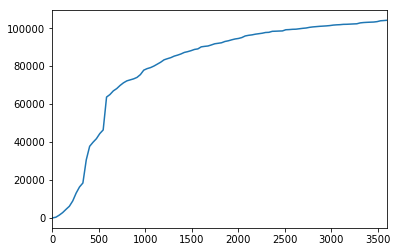

In [60]:
maxs.plot()

In [61]:
# Filter edges
filtered = EG.filter_edges(delta_ub=240)

In [62]:
from eventgraphs.clustering import generate_features, FEATURE_SPEC

FEATURE_SPEC['event_graph_features'][1]['kwargs'] = {'miller_correct':False, 'k':24}
FEATURE_SPEC['event_graph_features'][2]['kwargs'] = {'miller_correct':False, 'divisions':10}

# Create components
components = filtered.connected_components(min_size=5)

In [63]:
# Generate features
features, scale_features = generate_features(components, feature_spec=FEATURE_SPEC)

In [64]:
# Rescale features
from sklearn.preprocessing import Normalizer

rs_features = Normalizer().fit_transform(features)
rs_features = pd.DataFrame(rs_features, index=features.index, columns=features.columns)

In [65]:
from eventgraphs.clustering import find_clusters
from sklearn.metrics import silhouette_score

# Find Number of clusters
scores = {}
for cluster_size in range(2,16):
    clusters, cluster_centers = find_clusters(rs_features, max_clusters=cluster_size, metric='cosine')
    scores[cluster_size] = silhouette_score(rs_features, clusters)
scores = pd.Series(scores)

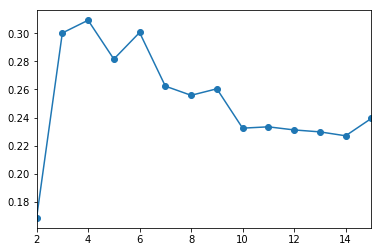

In [66]:
scores.plot(marker='o')

In [67]:
# Generate Clusters
max_clusters = 4
clusters, cluster_centers = find_clusters(rs_features, max_clusters=max_clusters, metric='cosine')
filtered.add_cluster_assignments(clusters)

In [68]:
from eventgraphs.clustering import reduce_feature_dimensionality
from eventgraphs.plotting import plot_component_embedding

# Feature-space plot

X, (tsne, _) = reduce_feature_dimensionality(rs_features, 
                                             ndim=2, 
                                             method='tsne', 
                                             return_scalers=True, 
                                             **dict(random_state=0, 
                                                  verbose=True, 
                                                  learning_rate=500),)

Y, PCA = reduce_feature_dimensionality(rs_features, 
                                       ndim=3, 
                                       method='pca', 
                                       return_scalers=True,) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5642 samples in 0.009s...
[t-SNE] Computed neighbors for 5642 samples in 0.864s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5642
[t-SNE] Computed conditional probabilities for sample 2000 / 5642
[t-SNE] Computed conditional probabilities for sample 3000 / 5642
[t-SNE] Computed conditional probabilities for sample 4000 / 5642
[t-SNE] Computed conditional probabilities for sample 5000 / 5642
[t-SNE] Computed conditional probabilities for sample 5642 / 5642
[t-SNE] Mean sigma: 0.006713
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.651314
[t-SNE] Error after 1000 iterations: 0.807492


In [69]:
print("Explained Ratio: {}".format(PCA.explained_variance_ratio_))
print("Total Explained: {}".format(sum(PCA.explained_variance_ratio_)))

Explained Ratio: [ 0.44051216  0.18925064  0.0942446 ]
Total Explained: 0.7240073886802001


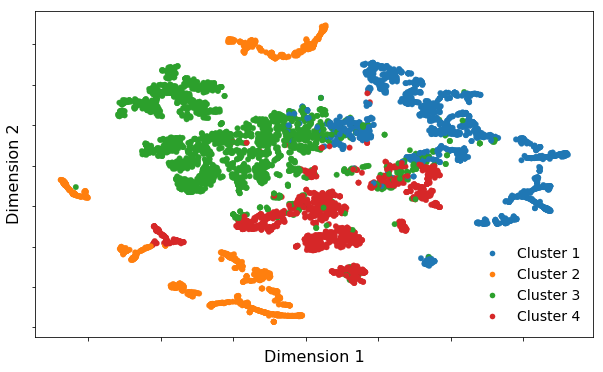

In [70]:
with plt.style.context(['seaborn-paper', PLOT_STYLE, {'legend.fontsize':14,
                                                      'legend.frameon':False}]):

    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)

    ax = plot_component_embedding(X, clusters=clusters, ax=ax);

In [86]:
# Plot representative examples

from eventgraphs.plotting import plot_aggregate_graph
EVENT_CMAP = {'message':'darkgreen', 'retweet':'red', 'reply':'blue', 'status':'grey'}

for c,ix in [(1,1),(2,1),(3,2),(4,0)]:

    cfeatures = rs_features.loc[clusters[clusters==c].index]
    differences = ((cfeatures - cfeatures.mean())**2).mean(axis=1)
    component_ix = differences.nsmallest(15).index[ix]

    featured_component = filtered.get_component(component_ix)

    A = plot_aggregate_graph(featured_component, edge_colormap=EVENT_CMAP, display=False)

    charmap = {1:'a',2:'b',3:'c',4:'d',5:'e',}
    with open('./figures/clustering_example_{}.eps'.format(charmap[c]), 'wb') as file:
        file.write(A.create(format='eps'))

## UCIRVINE

In [87]:
EG = EventGraph.from_file('./data/eventgraphs/social-ucirvine.json')

In [96]:
# Fix to get around eventgraphs bug (fixed in latest version)
EG.events.target = EG.events.target.apply(lambda x: [x])

In [121]:
from eventgraphs.analysis import calculate_component_distribution_over_delta

dt_range = np.linspace(0,86400, 100)
EG.generate_eg_matrix()
dists, maxs = calculate_component_distribution_over_delta(EG, dt_range)

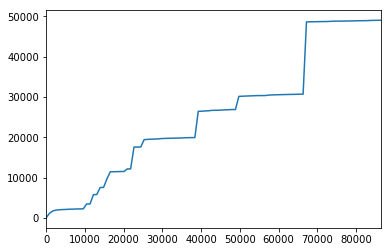

In [122]:
maxs.plot()

In [97]:
# Filter edges
filtered = EG.filter_edges(delta_ub=7200)

In [98]:
from eventgraphs.clustering import generate_features, FEATURE_SPEC

FEATURE_SPEC['event_graph_features'][1]['kwargs'] = {'miller_correct':False, 'k':24}
FEATURE_SPEC['event_graph_features'][2]['kwargs'] = {'miller_correct':False, 'divisions':10}

# Create components
components = filtered.connected_components(min_size=5)

In [99]:
# Generate features
features, scale_features = generate_features(components, feature_spec=FEATURE_SPEC)

In [100]:
# Rescale features
from sklearn.preprocessing import Normalizer

rs_features = Normalizer().fit_transform(features)
rs_features = pd.DataFrame(rs_features, index=features.index, columns=features.columns)

In [101]:
from eventgraphs.clustering import find_clusters
from sklearn.metrics import silhouette_score

# Find Number of clusters
scores = {}
for cluster_size in range(2,16):
    clusters, cluster_centers = find_clusters(rs_features, max_clusters=cluster_size, metric='cosine')
    scores[cluster_size] = silhouette_score(rs_features, clusters)
scores = pd.Series(scores)

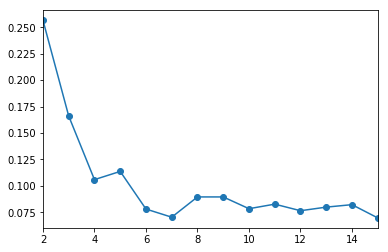

In [102]:
scores.plot(marker='o')

In [103]:
# Generate Clusters
max_clusters = 3
clusters, cluster_centers = find_clusters(rs_features, max_clusters=max_clusters, metric='cosine')
filtered.add_cluster_assignments(clusters)

In [104]:
from eventgraphs.clustering import reduce_feature_dimensionality
from eventgraphs.plotting import plot_component_embedding

# Feature-space plot

X, (tsne, _) = reduce_feature_dimensionality(rs_features, 
                                             ndim=2, 
                                             method='tsne', 
                                             return_scalers=True, 
                                             **dict(random_state=0, 
                                                  verbose=True, 
                                                  learning_rate=500),)

Y, PCA = reduce_feature_dimensionality(rs_features, 
                                       ndim=3, 
                                       method='pca', 
                                       return_scalers=True,) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 835 samples in 0.001s...
[t-SNE] Computed neighbors for 835 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 835 / 835
[t-SNE] Mean sigma: 0.108214
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.825386
[t-SNE] Error after 1000 iterations: 0.851038


In [105]:
print("Explained Ratio: {}".format(PCA.explained_variance_ratio_))
print("Total Explained: {}".format(sum(PCA.explained_variance_ratio_)))

Explained Ratio: [ 0.51036806  0.1448734   0.13122123]
Total Explained: 0.7864626866167365


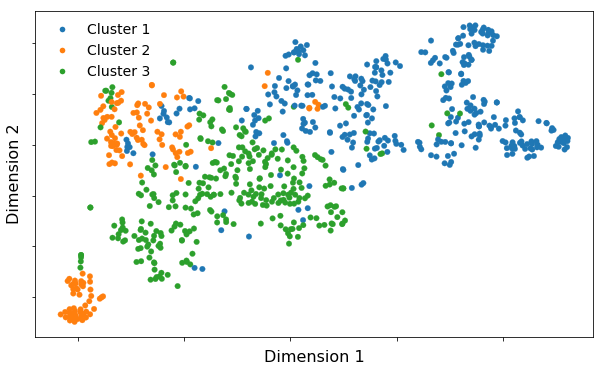

In [106]:
with plt.style.context(['seaborn-paper', PLOT_STYLE, {'legend.fontsize':14,
                                                      'legend.frameon':False}]):

    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)

    ax = plot_component_embedding(X, clusters=clusters, ax=ax);

In [118]:
# Plot representative examples

from eventgraphs.plotting import plot_aggregate_graph

for c,ix in [(1,1),(2,7),(3,5)]:

    cfeatures = rs_features.loc[clusters[clusters==c].index]
    differences = ((cfeatures - cfeatures.mean())**2).mean(axis=1)
    component_ix = differences.nsmallest(15).index[ix]

    featured_component = filtered.get_component(component_ix)

    A = plot_aggregate_graph(featured_component, display=False)

    charmap = {1:'a',2:'b',3:'c',4:'d',5:'e',}
    with open('./figures/clustering_example_uc_{}.eps'.format(charmap[c]), 'wb') as file:
        file.write(A.create(format='eps'))